# Vehicle Detection
*Brian Erickson*

This notebook implements the *Vehicle Detection* project of the Udacity Self Driving Car NanoDegree.

It includes both investigations and the solution to the project.  

The rubric for the project is located here:

Rubric for the project is located [here](https://review.udacity.com/#!/rubrics/513/view)

## Imports and Helper Functions

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import os.path
import wget
import zipfile
import glob


## Get Training Data

In [30]:
# vehicles
if not os.path.exists('datasets/vehicles'):
    f = wget.download('https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip')
    with zipfile.ZipFile(f, 'r') as z:
        z.extractall(path='datasets')
    os.remove(f)
    os.remove('datasets/__MACOSX')
    

In [31]:
# non-vehicles
if not os.path.exists('datasets/non-vehicles'):
    f = wget.download('https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip')
    with zipfile.ZipFile(f, 'r') as z:
        z.extractall(path='datasets')
    os.remove(f)
    os.remove('datasets/__MACOSX')

## Investigations

In [6]:
### Color Spaces

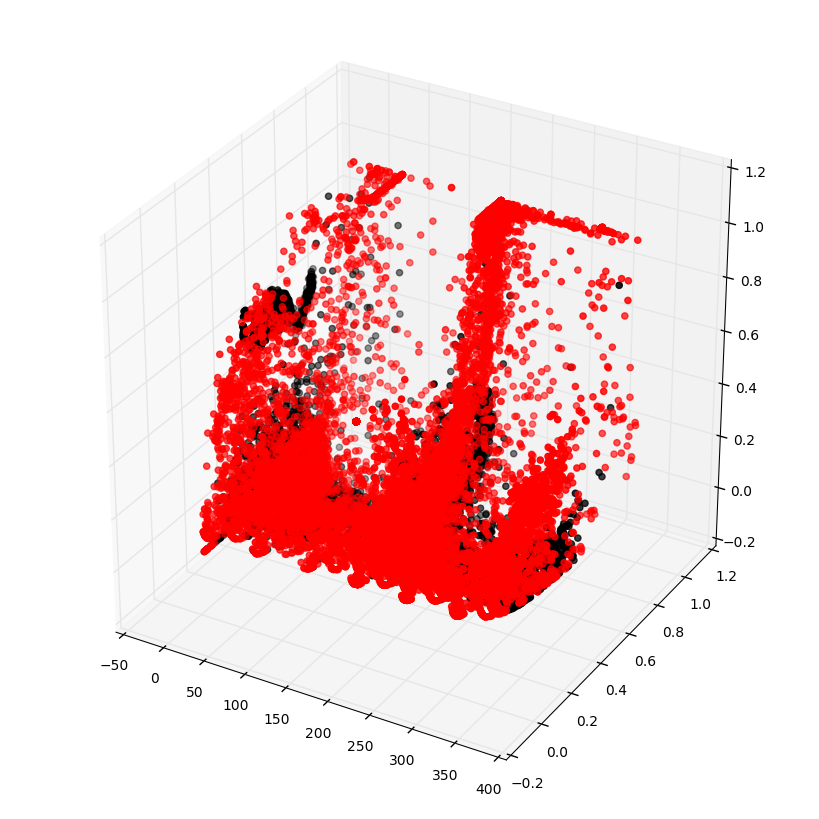

In [17]:

# Based on code from Lesson 14. Explore Color Spaces
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image

# Select a small fraction of pixels to plot by subsampling it
#scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
#img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
#img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
#img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
#img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting#

# Plot and show
#plot3d(img_small_RGB, img_small_rgb)
#plt.show()
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
cvt = lambda im: cv2.cvtColor(im,cv2.COLOR_RGB2HLS)
for f in glob.glob('color_spaces/vehicles/*'):
    im = cvt(plt.imread(f))
    ax.scatter(im[:,:,0].ravel(),im[:,:,1].ravel(),im[:,:,2].ravel(),color='r')
for f in glob.glob('color_spaces/non-vehicles/*'):
    im = cvt(plt.imread(f))
    ax.scatter(im[:,:,0].ravel(),im[:,:,1].ravel(),im[:,:,2].ravel(),color='k')
    #plot3d(im, im, axis_labels=list("HSV"))
plt.show()

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

cvt = lambda im: cv2.cvtColor(im,cv2.COLOR_RGB2HLS)
for f in glob.glob('color_spaces/vehicles/*'):
    im = cvt(plt.imread(f))
    x = im[:,:,0].ravel()
    y = im[:,:,1].ravel()
    z = im[:,:,2].ravel()
    t1 = go.Scatter3d(x=x,y=y,z=z)
    
    ax.scatter(im[:,:,0].ravel(),im[:,:,1].ravel(),im[:,:,2].ravel(),color='r')
for f in glob.glob('color_spaces/non-vehicles/*'):
    im = cvt(plt.imread(f))
    ax.scatter(im[:,:,0].ravel(),im[:,:,1].ravel(),im[:,:,2].ravel(),color='k')
